# Introduction au Notebook d'Apprentissage du Machine Learning

Bienvenue dans ce notebook dédié à l'apprentissage du machine learning (ML), conçu pour les débutants. Le machine learning est une branche de l'intelligence artificielle qui permet aux ordinateurs d'apprendre à partir de données et de faire des prédictions ou des décisions sans être explicitement programmés pour chaque tâche. 


Dans ce notebook, nous allons nous concentrer sur un cas d'**apprentissage supervisé** plus spécifiquement un problème de **régression**. La régression consiste à prédire une **valeur numérique** continue en fonction d'un certain nombre de variables explicatives. Dans notre cas, nous allons essayer de prédire le **prix des voitures** en fonction de diverses caractéristiques comme la marque, le kilométrage, l'année, etc.

## Fonctionnement d'un Jupyter Notebook

Un **Jupyter Notebook** est un environnement interactif qui permet de combiner du code exécutable, du texte explicatif, des graphiques et d'autres éléments visuels, le tout dans un même document. C'est un outil puissant pour les scientifiques des données, car il facilite l'expérimentation, l'analyse des données et la présentation des résultats. 

### Structure d'un Jupyter Notebook

Le notebook est organisé en **cellules** qui peuvent contenir soit du code, soit du texte en format Markdown (comme cette cellule). Voici les deux principaux types de cellules :

1. **Cellules de code** : Ce sont des blocs dans lesquels vous écrivez et exécutez du code (souvent en Python, mais Jupyter supporte plusieurs langages). Lorsque vous exécutez une cellule de code, le résultat est affiché juste en dessous. Cela peut être un résultat de calcul, un tableau, ou encore un graphique.

2. **Cellules de texte (Markdown)** : Ces cellules permettent d'écrire des explications, des titres, des listes ou d'autres formes de documentation en utilisant le langage Markdown. Cela permet de rendre le notebook lisible et structuré. Vous pouvez formater le texte en ajoutant des titres, des listes, des liens ou des images.

### Exécution des cellules

Chaque cellule de code peut être exécutée indépendamment en appuyant sur le bouton "Exécuter" ou en utilisant le raccourci `Shift + Enter`. Les cellules de code s'exécutent dans l'ordre dans lequel vous les exécutez, et non nécessairement de haut en bas. Cela vous permet de tester des sections spécifiques de votre code sans avoir à exécuter tout le document.


## Étapes du Notebook

1. **Importation et Analyse Exploratoire des Données (EDA)** : Avant de créer un modèle, il est essentiel de bien comprendre les données avec lesquelles nous travaillons. Cette première étape consiste à importer les données, à examiner leur structure et à identifier des patterns ou des anomalies.
   
2. **Préparation des données** : Nous préparerons les données pour la modélisation en les nettoyant, en traitant les valeurs manquantes et en convertissant les variables catégorielles en un format que le modèle peut comprendre.

3. **Modélisation avec des algorithmes de régression** : Nous créerons des modèles de régression, tels que la régression linéaire ou d'autres modèles plus avancés, pour prédire le prix des voitures.

4. **Explicabilité du modèle**


## Présentation du Dataset

<div style="text-align: center;">
    <img src="Lambo_STJ_Huracan_1.jpeg" alt="Description de l'image" style="width:40%; height:auto;">
</div>


Le dataset utilisé dans ce notebook provient de la plateforme "Car Dekho" et contient des informations détaillées sur plusieurs modèles de voitures. Voici un aperçu des principales colonnes de ce dataset :

- **name** : Le nom et modèle spécifique de la voiture (ex : "Maruti Swift", "Hyundai Verna").
- **year** : L'année de fabrication de la voiture, qui peut avoir un impact sur sa valeur actuelle.
- **selling_price** : Le prix de vente de la voiture en roupies indiennes. Il s'agit de la variable cible que nous chercherons à prédire à partir des autres caractéristiques.
- **km_driven** : Le nombre de kilomètres parcourus par la voiture, un indicateur clé de l'usure et de l'état général du véhicule.
- **fuel** : Le type de carburant utilisé par la voiture (essence, diesel, GNV, etc.).
- **seller_type** : Le type de vendeur (particulier ou concessionnaire), ce qui peut influencer le prix de vente.
- **transmission** : Le type de transmission du véhicule (manuelle ou automatique).
- **owner** : Le nombre de propriétaires précédents de la voiture, qui peut affecter la perception de l'usure du véhicule.

Ce jeu de données nous permettra de créer un modèle capable de prédire le **selling_price** (prix de vente) d'une voiture d'occasion en fonction des différentes caractéristiques mentionnées ci-dessus.


Prêt à commencer ? Passons à l'importation et à l'analyse de ces données !


## 1. Importation et Analyse exploratoire des données

Exécutez la cellule suivante pour charger et afficher les premières lignes du dataframe


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
df_main = pd.read_csv('car_price_cropped.csv')
df_main


Exécutez cette cellule pour afficher le nombre de données manquantes pour chacune des colonnes

In [ ]:
#missing values
df_main.isna().sum()

On observe qu'il n'y a aucune donnée manquantes, on peut donc passer à la suite sans passer par la phase de nettoyage des données manquantes. Nous pouvons passer à la phase de visualisation.

Modifiez la cellule suivante pour afficher des graphiques sur la distribution de l'essence, du type de vendeur, de la boite de vitesse et du propriétaire. Modifiez les XXX par les noms des colonnes correspondantes affichées plus haut

In [ ]:
cat_cols = ['XXX', 'XXX', 'XXX', 'XXX']
i = 0

while i < 4:
    fig = plt.figure(figsize=[12, 6])  # Augmentez la taille de la figure si nécessaire

    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df_main)
    plt.title(cat_cols[i])  # Ajout du titre pour la clarté
    plt.xticks(rotation=45)  # Rotation des labels si nécessaire

    i += 1

    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i], data=df_main)
    plt.title(cat_cols[i])  # Ajout du titre pour la clarté
    plt.xticks(rotation=45)  # Rotation des labels si nécessaire

    plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Ajoute de l'espace entre les sous-graphes
    plt.show()
    i += 1


De la même manière, affichez les distributions pour les colonnes correspondant à l'année, au prix de vente et au kilométrage.

In [ ]:
# Liste des colonnes numériques à tracer
num_cols = ['XXX', 'XXX', 'XXX']

# Définir la taille de la figure
plt.figure(figsize=(15, 5))

# Boucle sur chaque colonne numérique
for i, col in enumerate(num_cols):
    # Créer un sous-graphe pour chaque colonne
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(df_main[col], bins=20, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.show()

## Préparation des données

Il faut modifier les données pour les rendre utilisables par le modèle et plus claires:
- Modifier la date en age
- Encoder les catégories, créer une variable vrai ou faux a chaque fois (developper)

In [39]:
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [ ]:
df_main

### Création de set d'entrainement et de test

### Création de X et y

Avant de procéder au **train-test split**, il est important de structurer les données en deux parties principales :

1. **X** : Représente l'ensemble des caractéristiques ou **données explicatives** que l'on utilise pour prédire une cible.
2. **y** : Représente la **cible**, soit la variable dépendante que l'on souhaite prédire.

Ainsi, pour chaque observation dans les données, **X** contient les informations descriptives tandis que **y** contient le résultat attendu.


### Importance du Train-Test Split

Le **train-test split** est une étape essentielle dans le processus de développement d'un modèle de machine learning. Il consiste à diviser les données en deux ensembles distincts :

1. **Ensemble d'entraînement** : 
   - Utilisé pour entraîner le modèle. Le modèle apprend à partir de ces données.

2. **Ensemble de test** : 
   - Utilisé pour évaluer la performance du modèle. Il teste comment le modèle se comporte sur des données qu'il n'a jamais vues.

#### Pourquoi est-ce important ?

- **Généralisation** : En entraînant le modèle sur un ensemble et en le testant sur un autre, nous pouvons vérifier s'il est capable de faire des prédictions précises sur de nouvelles données. Cela aide à s'assurer que le modèle n'a pas simplement mémorisé les données d'entraînement, mais a réellement appris à généraliser à partir d'elles.

<br>

<br>

<div style="text-align: center;">
    <img src="/data/ai/hackathon/TrainTestDiagram1.png" alt="Description de l'image" style="width:40%; height:auto;">
</div>


Modifiez la cellule suivante pour créer le set de donnée explicatives X et la cible y, en remplaçant les XXX par le nom de la colonne cible, puis exécutez pour créer les sets d'entrainement et de test avec la fonction train_test_split


In [ ]:
from sklearn.model_selection import train_test_split

# Separating target variable and its features
y = df_main['XXX']
X = df_main.drop('XXX',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

## 3. Model Creation/Evaluation

Une fois les données divisées, nous pouvons passer à l'étape d'entraînement du modèle en utilisant l'ensemble d'entraînement, c'est-à-dire **X_train** et **y_train**. Modifiez le code en remplaçant les XXX par **X_train** et **y_train**, pour dire au modèle de faire correspondre les données d'entrainement a la cible.


In [ ]:
import xgboost as xgb


# Création et entraînement du modèle XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(XXX, XXX)


Maintenant que le modèle est entraîné, nous allons évaluer sa performance en effectuant des prédictions :

1. **Prédictions sur l'ensemble d'entraînement (X_train)** : Cela permet de voir comment le modèle se comporte sur les données qu'il a utilisées pour apprendre. Les prédictions obtenues sont comparées aux vraies valeurs de **y_train** pour évaluer la précision d'entraînement.

2. **Prédictions sur l'ensemble de test (X_test)** : Cet ensemble contient des données que le modèle n'a jamais vues. En effectuant des prédictions sur **X_test**, nous pouvons évaluer la capacité du modèle à généraliser et à prédire des résultats pour de nouvelles données. Ces prédictions sont ensuite comparées aux vraies valeurs de **y_test**.

Cette double évaluation est cruciale pour vérifier si le modèle a bien appris sans sur-ajuster aux données d'entraînement. Modifiez la cellule pour prédire ce que nous dit le modèle pour les sets d'entrainement et de test. Pour ce faire, remplacez les XXX par les noms des objets correspondants (X_train et X_test)

In [26]:
# Prédictions sur les ensembles d'entraînement et de test
y_pred_train = model.predict(XXX)
y_pred_test = model.predict(XXX)

#### Erreur Absolue Moyenne (MAE)

Quand on fait des prédictions, on veut que celles-ci soient **aussi proches que possible de la réalité**. Mais souvent, il y a un écart entre ce qu'on prédit et ce qui est vrai. Pour mesurer cet écart, on utilise une mesure spéciale qui s'appelle **l'Erreur Absolue Moyenne**, ou **MAE**.

Le MAE nous dit en moyenne de combien notre modèle se trompe à chaque prédiction.

- **MAE proche de 0** : Cela veut dire que le modèle est très précis, et ses prédictions sont vraiment proches de la réalité.
- **MAE plus grand** : Cela signifie que le modèle se trompe souvent et que ses prédictions s'éloignent des vraies valeurs.

L'objectif est donc d'avoir un **MAE le plus proche de 0 possible** pour indiquer un bon modèle. Exécutez la cellule suivante pour avoir la valeur de MAE pour les prédictions faites sur les sets d'entrainements et de test


In [ ]:
from sklearn.metrics import mean_absolute_error


# Calcul des MAE
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print("Train MAE :", MAE_train)
print("Test MAE :", MAE_test)


On voit que notre modèle fonctionne **assez bien**, mais on pense qu'il peut encore s'améliorer. Les résultats montrent que les prédictions sont **plus précises sur l'ensemble d'entraînement** que sur l'ensemble de test, ce qui indique qu'il pourrait mieux généraliser aux nouvelles données.

Pour essayer d'améliorer les performances, nous allons **ajouter une centaine de lignes de données supplémentaires**. Cela pourrait permettre au modèle de mieux apprendre les tendances générales et de faire des prédictions plus précises.


In [ ]:
df_main = pd.read_csv('car_price.csv')
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)
df_main = pd.get_dummies(data = df_main,drop_first=True) 

y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Création et entraînement du modèle XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print("Train MAE :", MAE_train)
print("Test MAE :", MAE_test)


On constate que notre modèle fonctionne **plutôt bien**, mais on peut encore faire mieux. Les résultats montrent que les prédictions sont **plus précises sur l'ensemble d'entraînement** que sur l'ensemble de test, ce qui indique qu'il pourrait encore mieux généraliser.

Pour améliorer les performances, nous allons **ajouter une nouvelle colonne** aux données, une colonne que nous savons importante : le **prix proposé**. Cela permettra au modèle d’avoir plus d’informations pour prédire le **prix de vente** avec plus de précision. En effet, la modélisation peut être biaisée par le fait que certaines voitures de collection vont être vendues plus cheres par rapport a la normale, ce qui va biaiser notre modèle.


In [ ]:
df_main = pd.read_csv('car_price_with_present_price.csv')
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.drop(labels='Car_Name',axis= 1, inplace = True)
df_main = pd.get_dummies(data = df_main,drop_first=True) 

y = df_main['Selling_Price']
X = df_main.drop('Selling_Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Création et entraînement du modèle XGBoost
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print("Train MAE :", MAE_train)
print("Test MAE :", MAE_test)


Avec l'ajout de la colonne du **prix proposé**, les performances du modèle sont désormais **nettement meilleures**. On observe que les prédictions sont plus précises, ce qui montre que cette information supplémentaire aide vraiment le modèle à mieux estimer le **prix de vente**.

Maintenant, pour aller encore plus loin, nous allons **tester plusieurs modèles différents**. Cela nous permettra de comparer leurs performances et de choisir le modèle le plus adapté pour nos prédictions.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Chargement et préparation des données
df_main = pd.read_csv('car_price_with_present_price.csv')
df_main['Age'] = 2020 - df_main['Year']
df_main.drop(['Year', 'Car_Name'], axis=1, inplace=True)
df_main = pd.get_dummies(data=df_main, drop_first=True)

# Séparation des caractéristiques et de la cible
y = df_main['Selling_Price']
X = df_main.drop('Selling_Price', axis=1)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Liste des modèles à comparer
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Entraînement et évaluation de chaque modèle
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calcul du MAE
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    
    # Affichage des résultats
    print(f"{model_name} - Train MAE: {MAE_train:.2f} | Test MAE: {MAE_test:.2f}")


Linear Regression - Train MAE: 1.21 | Test MAE: 1.10
Random Forest - Train MAE: 0.24 | Test MAE: 0.74
XGBoost - Train MAE: 0.01 | Test MAE: 0.54


Après avoir comparé plusieurs modèles, nous avons conclu que **XGBoost** offrait les meilleures performances pour prédire le **prix de vente**. Maintenant, pour aller plus loin et mieux comprendre les prédictions du modèle, nous allons nous pencher sur son **explicabilité**.

### 4. Explicabilité du Modèle

Pour expliquer les résultats d’un modèle complexe comme XGBoost, nous allons utiliser les **SHAP values** (SHapley Additive exPlanations). Les SHAP values sont une méthode d’interprétation qui permet de visualiser l'impact de chaque caractéristique sur les prédictions individuelles. Cette approche aide à comprendre comment chaque variable contribue aux décisions prises par le modèle.

Les principales étapes d'analyse avec les SHAP values sont :
- **Résumé global** : Voir l'impact moyen de chaque caractéristique sur toutes les prédictions de l'ensemble de test.
- **Explication individuelle** : Choisir une observation pour voir comment chaque caractéristique spécifique influence la prédiction.

Cette approche nous permettra d'avoir une vision claire et interprétable des facteurs clés dans les prédictions du modèle. Executez la cellule suivante pour afficher les importances globales des différentes variables


/data/home/zakary.saheb/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


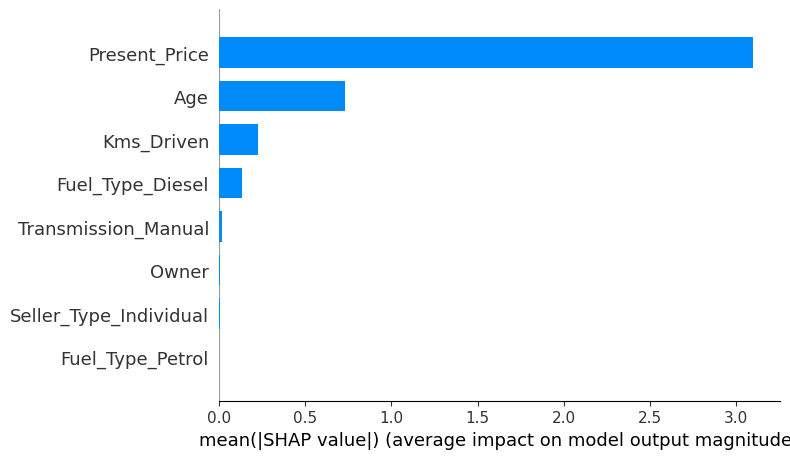

In [2]:
import shap 

# Calcul des SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Visualisation des SHAP values
shap.summary_plot(shap_values, X_test, plot_type='bar')
